In [ ]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay,
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/praktikum_ml/praktikum04"

In [ ]:
# Membaca data file CSV
df = pd.read_csv(path + "/data/calonpembelimobil.csv")
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [ ]:
# cek missing value
df.isnull().sum()

,0
ID,0
Usia,0
Status,0
Kelamin,0
Memiliki_Mobil,0
Penghasilan,0
Beli_Mobil,0


In [ ]:
print(df['Status'].unique())

[1 2 3 0]


In [ ]:
print(df['Kelamin'].unique())

[0 1]


In [ ]:
print("Distribusi Status: \n", df['Status'].value_counts())
print("\nDistribusi Kelamin: \n", df['Kelamin'].value_counts())

Distribusi Status: 
 Status
2    287
1    262
0    240
3    211
Name: count, dtype: int64

Distribusi Kelamin: 
 Kelamin
0    519
1    481
Name: count, dtype: int64


In [ ]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
ID,1.000000,0.149779,-0.006634,0.014646,0.068555,0.254177,0.168614
Usia,0.149779,1.000000,0.051476,0.019454,0.090926,0.125859,0.100127
Status,-0.006634,0.051476,1.000000,-0.008561,0.048302,0.071714,0.048584
Kelamin,0.014646,0.019454,-0.008561,1.000000,0.035199,-0.054211,-0.147301
Memiliki_Mobil,0.068555,0.090926,0.048302,0.035199,1.000000,0.137823,0.102005
Penghasilan,0.254177,0.125859,0.071714,-0.054211,0.137823,1.000000,0.763930
Beli_Mobil,0.168614,0.100127,0.048584,-0.147301,0.102005,0.763930,1.000000


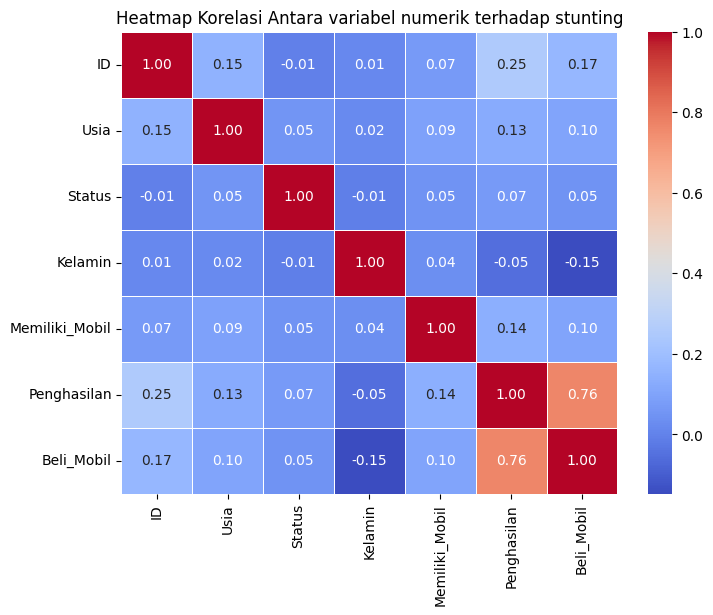

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antara variabel numerik terhadap stunting', fontsize=12)
plt.show()

In [ ]:
feature_cols = ['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']
target_col = 'Beli_Mobil'

X = df[feature_cols]
y = df[target_col]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1000, 5)
y shape: (1000,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("data latih:", X_train.shape)
print("data uji:", X_test.shape)

data latih: (800, 5)
data uji: (200, 5)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

feature_num = ['Usia', 'Penghasilan']
feature_bin = ['Status', 'Kelamin', 'Memiliki_Mobil']


preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), feature_num),
        ('bin', 'passthrough', feature_bin)
    ],
    remainder='drop'
)

model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced',
    random_state=42
)

clf = Pipeline([
    ('preprocess', preprocess),
    ('model', model)
])

clf.fit(X_train, y_train)
print("Model Logistic Regression berhasil dilatih.")

Model Logistic Regression berhasil dilatih.


In [ ]:
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print(f"Accuracy  : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision : {precision_score(y_test, y_pred):.4f}")
print(f"Recall    : {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score  : {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC   : {roc_auc_score(y_test, y_prob):.4f}")

Accuracy  : 0.9300
Precision : 0.9829
Recall    : 0.9055
F1 Score  : 0.9426
ROC AUC   : 0.9769


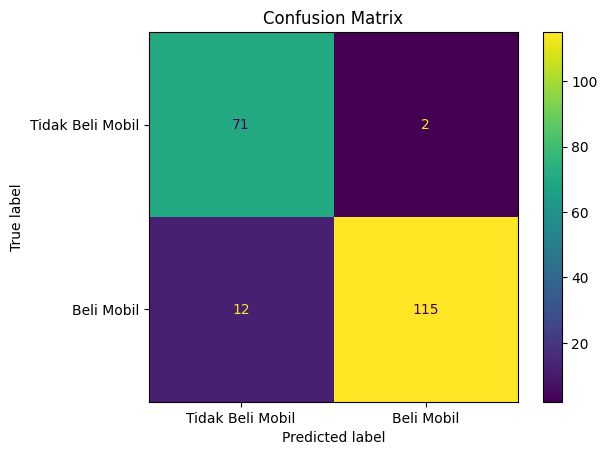

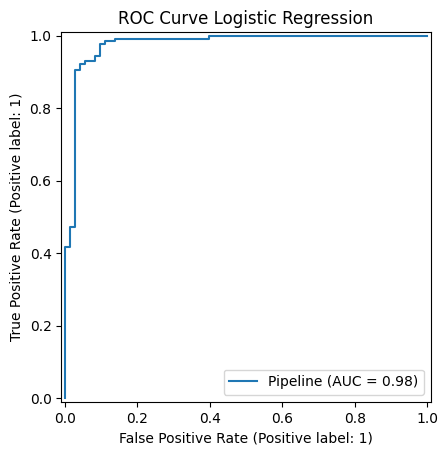

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),
                       display_labels=['Tidak Beli Mobil', 'Beli Mobil']).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()

RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title('ROC Curve Logistic Regression')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Tidak Beli Mobil', 'Beli Mobil']))

                  precision    recall  f1-score   support

Tidak Beli Mobil       0.86      0.97      0.91        73
      Beli Mobil       0.98      0.91      0.94       127

        accuracy                           0.93       200
       macro avg       0.92      0.94      0.93       200
    weighted avg       0.94      0.93      0.93       200



In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [0.775 0.915 0.955 0.945 0.94 ]
Mean accuracy: 0.9059999999999999
Standard deviation: 0.06681317235396023


In [ ]:
feat_names = feature_num + feature_bin
coefs = clf.named_steps['model'].coef_[0]
odds = np.exp(coefs)

coef_df = pd.DataFrame({
    'Feature': feat_names,
    'Coefficient': coefs,
    'Odds Ratio': odds
    }).sort_values(by='Odds Ratio', ascending=False)

display(coef_df)

,Feature,Coefficient,Odds Ratio
1,Penghasilan,4.550296,94.660404
4,Memiliki_Mobil,0.094958,1.099613
0,Usia,-0.046660,0.954412
2,Status,-0.124292,0.883122
3,Kelamin,-1.130837,0.322763


In [ ]:
data_baru = pd.DataFrame({
    'Usia': [25, 27, 30, 19],
    'Status': [1, 3, 2, 1],
    'Kelamin': [0, 0, 1, 1],
    'Memiliki_Mobil': [1, 2, 0, 1],
    'Penghasilan': [500, 250, 300, 300]
})

pred = clf.predict(data_baru)
prob = clf.predict_proba(data_baru)[:, 1]

hasil = data_baru.copy()
hasil['Probability'] = prob
hasil['Prediksi'] = pred

display(hasil)

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Probability,Prediksi
0,25,1,0,1,500,0.999999,1
1,27,3,0,2,250,0.805502,1
2,30,2,1,0,300,0.931945,1
3,19,1,1,1,300,0.946664,1
